In [ ]:
# !pip install diffusers transformers accelerate scipy safetensors translate gradio

In [ ]:
# !pip install ninja
# !pip install -v -U git+https://github.com/facebookresearch/xformers.git@main#egg=xformers

In [32]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch

model_id = "stabilityai/stable-diffusion-2-base"

# Use the Euler scheduler here instead
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Downloading:   0%|          | 0.00/308 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/539 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/738 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/460 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/929 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/716 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

  0%|          | 0/50 [00:00<?, ?it/s]

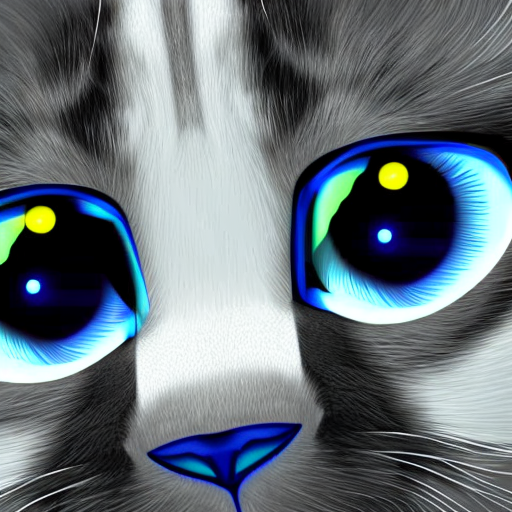

In [128]:
prompt = "robot siamese cat face with black face and blue eyes is crying. white simple background. artistic animation style."
image = pipe(prompt=prompt).images[0]
    
# image.save("result.png")
image

In [ ]:
from translate import Translator

translator = Translator(from_lang="ko", to_lang="en")

translation = translator.translate("두 마리 고양이들이 당구치는 사진. 한 고양이는 페르시안, 한 고양이는 샴.")

translation

In [ ]:
def generate_images(text):
    print(text)
    translation = translator.translate(text)
    print(translation)

    image = pipe(translation).images[0]

    return image

image = generate_images("펭귄이 곰한테 뽀뽀하는 모습")

image

In [ ]:
import gradio as gr

def inference(text):
    image = generate_images(text)
    return image

demo = gr.Interface(fn=inference, inputs="text", outputs="image")

demo.launch(debug=True, share=True)